##<h2>**1) INTRODUCTION**</h2>


In this practice, we build a deep learning network to predict the marketing campaign outcome ("deposit" either Yes or No) on a dataset called "bank", consisting of banking marketing campaign data and we can use it to optimize marketing campaigns to attract more customers to term deposit subscription.

1.1) **We import all necessary modules**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, skew
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow .keras.optimizers import RMSprop

1.2) **loading the dataset**

In [ ]:
bank=pd.read_csv("bank (2).csv")
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


##<h2>**2) OVERVIEW OF THE DATA**</h2>

In [ ]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [ ]:
bank.shape

(11162, 17)

In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [ ]:
bank.isnull().sum().sum()

0

In [ ]:
numeric_features = bank.dtypes[bank.dtypes != "object"].index
print(numeric_features)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


In [ ]:
categorical_features = bank.dtypes[bank.dtypes == "object"].index
print("categorical_features are :",categorical_features)

categorical_features are : Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')


In [ ]:
bank.month.value_counts()

may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: month, dtype: int64

In [ ]:
bank.poutcome.value_counts()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

##<h2>**3) EXPLORATORY DATA ANALYSIS**</h2>

* **The target value distribution** 

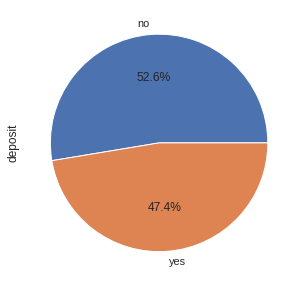

In [ ]:
plt.figure(figsize=(8,5))
bank['deposit'].value_counts().plot.pie(autopct="%1.1f%%")

* **Feautures distribution**

    **i) categorical features**

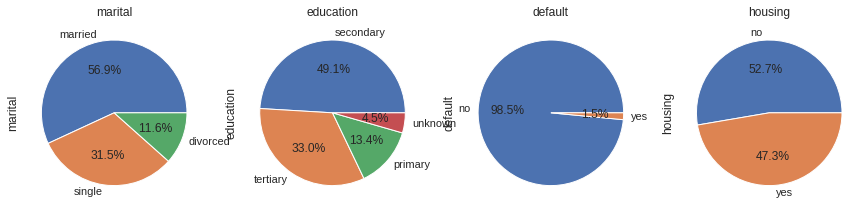

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,4,1)
bank["marital"].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("marital")
plt.subplot(1,4,2)
bank["education"].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("education")
plt.subplot(1,4,3)
bank["default"].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("default")
plt.subplot(1,4,4)
bank["housing"].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("housing")

plt.show()

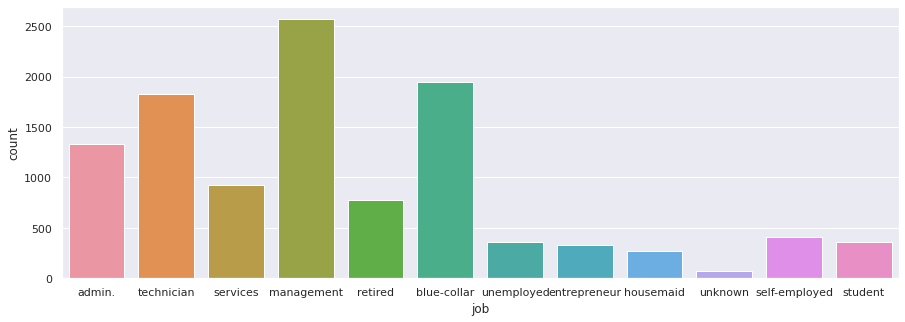

In [ ]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="job", data=bank)

  **ii) numerical features**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


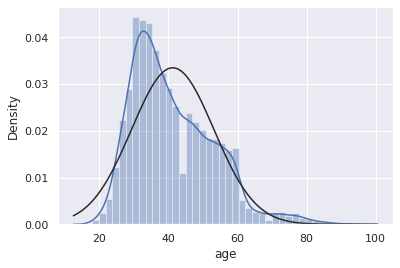

In [ ]:
sns.distplot(bank["age"], bins=  40, fit=norm)
plt.show()

**3.2) Multivariate analysis**

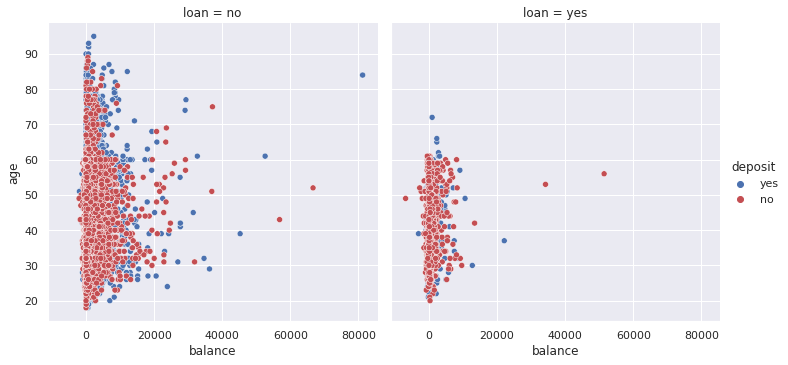

In [ ]:
sns.relplot(
    data=bank, x="balance", y="age", col="loan",
    hue="deposit",
    palette=["b", "r"], sizes=(10, 100)
)

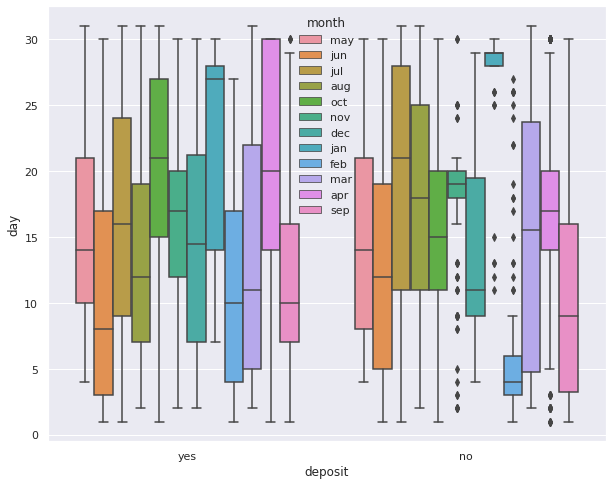

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(x='deposit',y='day',data=bank,hue='month')

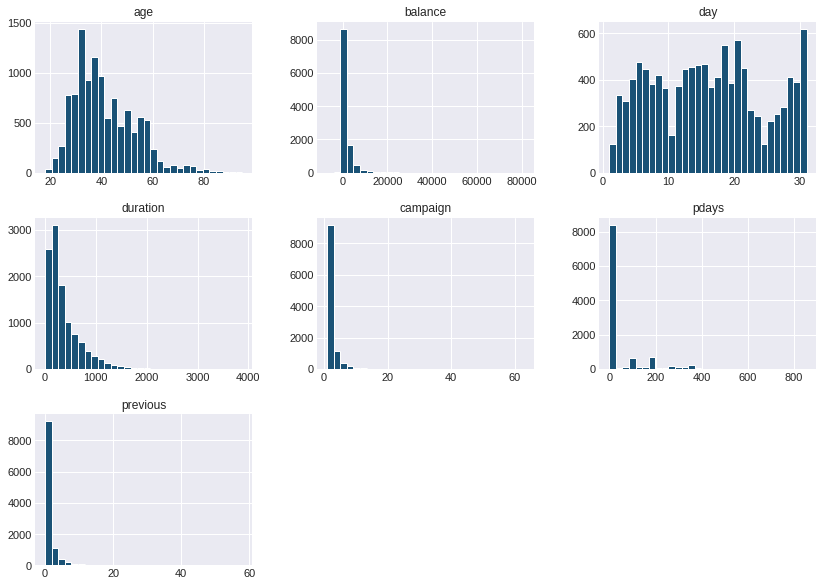

In [ ]:
plt.style.use('seaborn-darkgrid')

bank.hist(bins=30, figsize=(14,10), color='#1A5276')
plt.show()

**3.3) Total Correlations Between the Features**

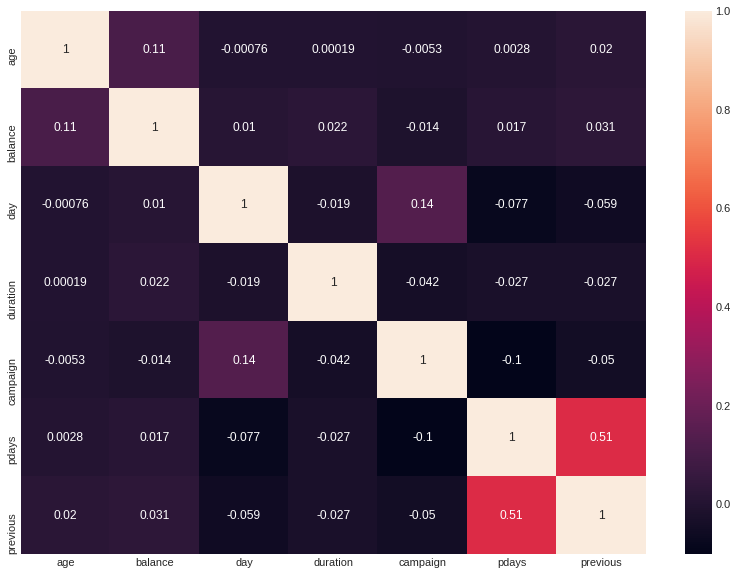

In [ ]:
plt.figure(figsize=(14,10))
corr = bank.corr()
sns.heatmap(corr, annot = True)

##<h2>**4) DATA MODELING**</h2>

#Data Preprocessing

In [ ]:
encoder=LabelEncoder()
bank["job"]=encoder.fit_transform(bank["job"])
bank["marital"]=encoder.fit_transform(bank["marital"])
bank["education"]=encoder.fit_transform(bank["education"])
bank["default"]=encoder.fit_transform(bank["default"])
bank["housing"]=encoder.fit_transform(bank["housing"])
bank["loan"]=encoder.fit_transform(bank["loan"])
bank["contact"]=encoder.fit_transform(bank["contact"])
bank["month"]=encoder.fit_transform(bank["month"])
bank["poutcome"]=encoder.fit_transform(bank["poutcome"])
bank["deposit"]=encoder.fit_transform(bank["deposit"])
bank.head() 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [ ]:
X = bank.drop(['deposit'], axis = 1)
y = bank.deposit.values

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
X.shape

(11162, 16)

In [ ]:
y.shape

(11162,)

**4.3)  Split the dataset into a training set and a testing set**

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler

X_std = StandardScaler()
X_train = X_std.fit_transform(X_train)
X_valid = X_std.fit_transform(X_valid)

In [ ]:


# Create a sequential model here 
model = Sequential([Dense(32, input_dim=16, 
                      kernel_initializer="uniform", activation="relu"),
                      Dense(16, 
                      kernel_initializer="uniform", activation="relu"),
                      Dropout(0.2),
                      Dense(16, 
                      kernel_initializer="uniform", activation="relu"),
                      Dropout(0.5),
                      Dense(1, activation="sigmoid")])

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_29 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_14 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_15 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 17        
Total params: 1,361
Trainable params: 1,361
Non-trainable params: 0
____________________________________________________

In [ ]:
model.compile(loss="binary_crossentropy", optimizer="Nadam", metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=12)

Epoch 1/12
280/280 [==============================] - 2s 2ms/step - loss: 0.5426 - accuracy: 0.7373 - val_loss: 0.4328 - val_accuracy: 0.8173
Epoch 2/12
280/280 [==============================] - 1s 2ms/step - loss: 0.4609 - accuracy: 0.8030 - val_loss: 0.4255 - val_accuracy: 0.8150
Epoch 3/12
280/280 [==============================] - 1s 2ms/step - loss: 0.4521 - accuracy: 0.8067 - val_loss: 0.4151 - val_accuracy: 0.8227
Epoch 4/12
280/280 [==============================] - 1s 2ms/step - loss: 0.4455 - accuracy: 0.8126 - val_loss: 0.4158 - val_accuracy: 0.8213
Epoch 5/12
280/280 [==============================] - 1s 2ms/step - loss: 0.4403 - accuracy: 0.8118 - val_loss: 0.4106 - val_accuracy: 0.8209
Epoch 6/12
280/280 [==============================] - 1s 2ms/step - loss: 0.4357 - accuracy: 0.8135 - val_loss: 0.4131 - val_accuracy: 0.8227
Epoch 7/12
280/280 [==============================] - 1s 2ms/step - loss: 0.4407 - accuracy: 0.8125 - val_loss: 0.4169 - val_accuracy: 0.8200
Epoch 

In [ ]:
test_loss, test_acc = model.evaluate(X_valid,  y_valid, verbose=2)
print('\nTest accuracy:', test_acc *100, '%')

70/70 - 0s - loss: 0.4005 - accuracy: 0.8258

Test accuracy: 82.57948756217957 %
